<a href="https://colab.research.google.com/github/babyraggge/ml-algorithms/blob/main/06_descion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

Реализовать вычисление энтропии и посчитать её значение для:

* (0.2, 0.2, 0.2, 0.2, 0.2)
* (0.5, 0.5)
* (0.9, 0.05, 0.05, 0)
* (0, 0, 0, 0, 1, 0)

Объяснить полученные результаты

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons

In [ ]:
def entropy(p: np.array):
  return -np.nansum(p * np.log2(p))

In [ ]:
p1 = np.array((0.2, 0.2, 0.2, 0.2, 0.2))
p2 = np.array((0.5, 0.5))
p3 = np.array((0.9, 0.05, 0.05, 0))
p4 = np.array((0, 0, 0, 0, 1, 0))

In [ ]:
print(f"""
    Entropy 1: {entropy(p1)}\n
    Entropy 2: {entropy(p2)}\n
    Entropy 3: {entropy(p3)}\n
    Entropy 4: {entropy(p4)}
""")


    Entropy 1: 2.321928094887362

    Entropy 2: 1.0

    Entropy 3: 0.5689955935892812

    Entropy 4: -0.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


В первых двух случаях энтропия наибольшая: все вероятности равны и невозможно сделать предположение о полученном варианте.
В третьем случае наибольшая вероятность для первого варианта и она сильно больше остальных, поэтому энтропия уменьшается
В четвертом случае имеется лишь один вариант с ненулевой вероятностью, следовательно никакой неопределенности нет: энтропия равна нулю. 

# Задание 3

Постройте решающее дерево с глубиной 1, 2 и 3.
Также постройте дерево максимальной глубины
Визуализируйте получившиеся результаты классификатора на плоскости (код есть в предыдущих лабах)

In [ ]:
def draw_class_border(clf, x, y, h=.03, cmap=plt.cm.coolwarm):
  x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
  y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(7,7))
  plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
  plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
  plt.title(f"k = {clf.max_depth}")
  plt.show()

In [ ]:
def accuracy(pred, real):
  counter = 0;
  for i in range(pred.shape[0]):
    if pred[i] == real[i]:
      counter += 1
  return counter / pred.shape[0]

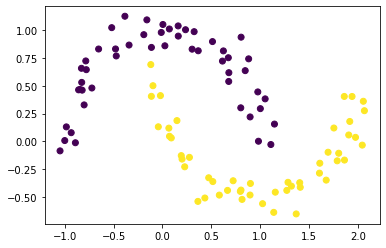

In [ ]:
x, y = make_moons(n_samples=100, noise=0.1)
plt.scatter(x[:,0], x[:,1], c = y);

In [ ]:
X_train = x[:70]
y_train = y[:70]
X_test = x[70:]
y_test = y[70:]

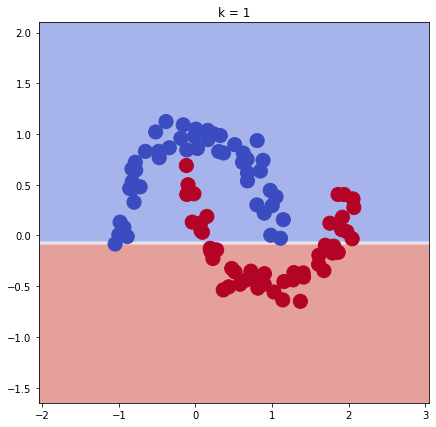

Predicted labels with 1 depth: [0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1]
Accuracy score with 1 depth is 0.7


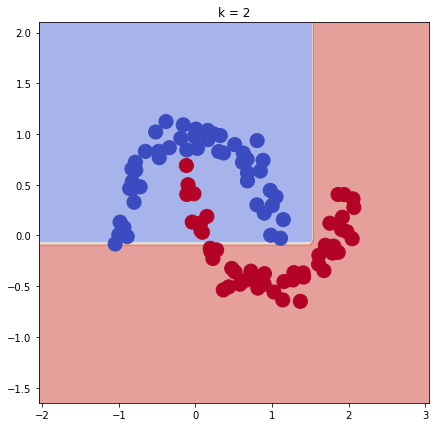

Predicted labels with 2 depth: [0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1]
Accuracy score with 2 depth is 0.9


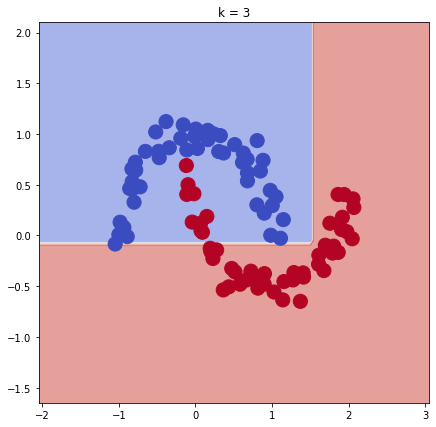

Predicted labels with 3 depth: [0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1]
Accuracy score with 3 depth is 0.9


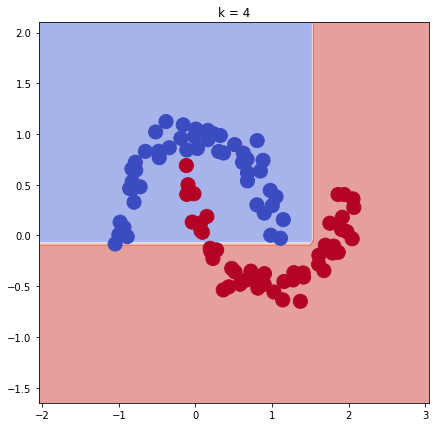

Predicted labels with 4 depth: [0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1]
Accuracy score with 4 depth is 0.9


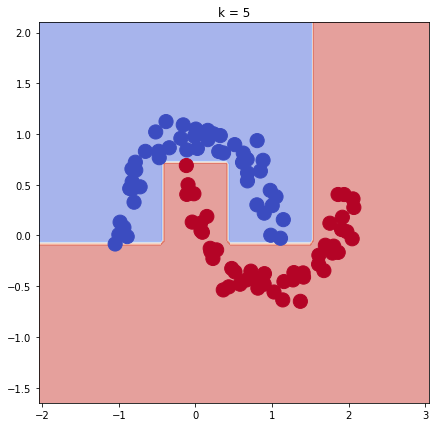

Predicted labels with 5 depth: [0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1]
Accuracy score with 5 depth is 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

depths = [1, 2, 3, 4,5]

for depth in depths:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train)
  draw_class_border(dt, x, y, h=.05)

  y_pred = dt.predict(X_test)
  print(f"Predicted labels with {depth} depth: {y_pred}")
  print(f"Accuracy score with {depth} depth is {accuracy(y_pred, y_test)}")
